In [103]:
import mxnet as mx
from mxnet import image

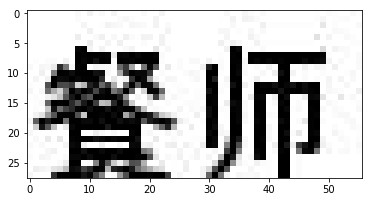

In [104]:

#matplotlib inline
import matplotlib.pyplot as plt
img_decode= image.imdecode(open('./input/test_data/item0_.jpeg','rb').read())
plt.imshow(img_decode.asnumpy())

In [105]:
import matplotlib.image as mpimg

(28, 56, 3)


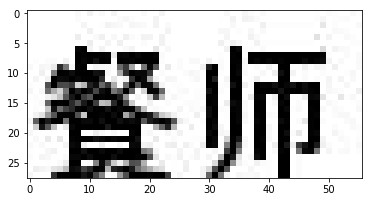

In [106]:
%matplotlib inline
imnumpy = mpimg.imread('./input/test_data/item0_.jpeg')
plt.imshow(imnumpy)
print(imnumpy.shape)

In [107]:
#获取训练集目录下的所有文件名，从其中提取出label
import os
test_path = './input/test_data'

test_files = os.listdir(test_path)

    

In [108]:
def extract_label(name):
    ret = name.split('.')[0].split('_')[1]
    if(len(ret)==0):
        return [0,0]
    elif(len(ret)==2):
        return [1,1]
    elif(len(ret)==1 and ret=='0'):
        return [1,0]
    elif(len(ret)==1 and ret=='1'):
        return [0,1]

In [154]:
for item in test_files[0:10]:
    item_img = image.imdecode(open(test_path+'/'+item,'rb').read())
    #print(item_img.shape)

In [111]:
#自己写一个生成path_imglist的函数。
#index    labels    path
def gen_imglist(path):
    files = os.listdir(path)
    indexes = len(files)
    with open('image.lst','w') as fh:
        for ind,file in enumerate(files):
            line = str(ind)+'\t'
            label = extract_label(file)
            line += str(label[0]) +'\t'+str(label[1]) +'\t'+ file+'\n'
            fh.write(line)
            
            
gen_imglist('./input/test_data/')     

In [215]:

data_iter = image.ImageIter(batch_size=3,shuffle = True,data_shape=(3,28,56),label_width=2,path_imglist='./image.lst',path_root = './input/test_data/')

In [119]:
# 数据准备好了，构建神经网络并训练 怎么构建呢？很明显都是套路
#1. 定义网络结构
from mxnet import gluon
from mxnet.gluon import nn
def network():
    base = nn.Sequential()
    with base.name_scope():
        #卷积层啊，输入图片是28 * 56
        base.add(nn.Conv2D(channels=5,kernel_size=2,strides=2,padding=1,activation='relu'))
        #output size 5 * 14 * 28
        base.add(nn.Conv2D(channels=8,kernel_size=2,strides=2,padding=1,activation='relu'))
        #output size 8* 7 *14
        base.add(nn.Flatten())
        #flatten
        base.add(nn.Dense(2))
    return base
        
        

In [120]:
net = network()

In [ ]:
from mxnet.gluon.model_zoo import vision
alexnet = vision.alexnet(pretrained = True)

In [155]:
from mxnet import ndarray as F
img_input = F.zeros((10,3,28,56))

In [156]:
#需要初始化 net的参数
net.initialize()
out = net(img_input)

C:\ProgramData\Anaconda3\lib\site-packages\mxnet-0.11.1-py3.6.egg\mxnet\gluon\parameter.py:276: UserWarning: Parameter sequential2_conv0_weight is already initialized, ignoring. Set force_reinit=True to re-initialize.
  "Set force_reinit=True to re-initialize."%self.name)
C:\ProgramData\Anaconda3\lib\site-packages\mxnet-0.11.1-py3.6.egg\mxnet\gluon\parameter.py:276: UserWarning: Parameter sequential2_conv0_bias is already initialized, ignoring. Set force_reinit=True to re-initialize.
  "Set force_reinit=True to re-initialize."%self.name)
C:\ProgramData\Anaconda3\lib\site-packages\mxnet-0.11.1-py3.6.egg\mxnet\gluon\parameter.py:276: UserWarning: Parameter sequential2_conv1_weight is already initialized, ignoring. Set force_reinit=True to re-initialize.
  "Set force_reinit=True to re-initialize."%self.name)
C:\ProgramData\Anaconda3\lib\site-packages\mxnet-0.11.1-py3.6.egg\mxnet\gluon\parameter.py:276: UserWarning: Parameter sequential2_conv1_bias is already initialized, ignoring. Set for

In [ ]:
#下一步就是训练网络了，要先定义损失函数
#每个样本有两个类


In [212]:
out[:,1]


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
<NDArray 10 @cpu(0)>

In [276]:
loss1 = gluon.loss.SigmoidBinaryCrossEntropyLoss()
loss2 = gluon.loss.SigmoidBinaryCrossEntropyLoss()


In [277]:
data_iter.reset()
a = data_iter.next()

In [282]:
#两部分loss应该独立计算，然后再加起来。
from mxnet import autograd
import numpy as np
trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.2})

num_epoch=1
for i in range(num_epoch):
    train_loss = 0.0
    train_acc = 0.0
    data_iter.reset()
    #batch_size = sample_size
    data = data_iter.next()
    features = data.data[0]
    labels =data.label[0]
    with autograd.record():
        output = net(features)
        loss1(output[:,0],labels[:,0])
        loss2(output[:,1],labels[:,1])
        #total_loss = loss1 + loss2
  


    
    
    

In [231]:
from mxnet import ndarray

In [237]:
a = data_iter.next()

In [256]:
data = a.data

In [242]:
data = np.array(data)

In [261]:
b = a.label

In [275]:
gluon.loss.SoftmaxCrossEntropyLoss??